In [3]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [4]:
path = '../../parsers/official/data/club_stat.csv'
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
df.head()

,season_id,name,club_name,club_shortName,club_abbr,club_id,teamType,shortName,id,_accurate_back_zone_pass,_accurate_chipped_pass,_accurate_corners_intobox,_accurate_cross,_accurate_cross_nocorner,_accurate_flick_on,_accurate_freekick_cross,_accurate_fwd_zone_pass,_accurate_goal_kicks,_accurate_keeper_sweeper,_accurate_keeper_throws,_accurate_launches,_accurate_layoffs,_accurate_long_balls,_accurate_pass,_accurate_pull_back,_accurate_through_ball,_accurate_throws,_aerial_lost,_aerial_won,_attempted_tackle_foul,_attempts_conceded_ibox,_attempts_conceded_obox,_attempts_ibox,_attempts_obox,_att_assist_openplay,_att_assist_setplay,_att_bx_centre,_att_bx_left,_att_bx_right,_att_cmiss_high,_att_cmiss_left,_att_cmiss_right,_att_corner,_att_fastbreak,_att_goal_high_centre,_att_goal_high_left,_att_goal_high_right,_att_goal_low_centre,_att_goal_low_left,_att_goal_low_right,_att_hd_goal,_att_hd_miss,_att_hd_post,_att_hd_target,_att_hd_total,_att_ibox_blocked,_att_ibox_goal,_att_ibox_miss,_att_ibox_post,_att_ibox_target,_att_lf_goal,_att_lf_target,_att_lf_total,_att_miss_high,_att_miss_high_left,_att_miss_high_right,_att_miss_left,_att_miss_right,_att_obox_blocked,_att_obox_goal,_att_obox_miss,_att_obox_target,_att_obx_centre,_att_one_on_one,_att_openplay,_att_pen_goal,_att_post_left,_att_rf_goal,_att_rf_target,_att_rf_total,_att_setpiece,_att_sv_high_centre,_att_sv_high_left,_att_sv_high_right,_att_sv_low_centre,_att_sv_low_left,_att_sv_low_right,_backward_pass,_ball_recovery,_big_chance_created,_big_chance_missed,_big_chance_scored,_blocked_cross,_blocked_pass,_blocked_scoring_att,_challenge_lost,_clean_sheet,_clearance_off_line,_contentious_decision,_corner_taken,_crosses_18yard,_crosses_18yardplus,_defender_goals,_dispossessed,_diving_save,_draws,_duel_lost,_duel_won,_effective_blocked_cross,_effective_clearance,_effective_head_clearance,_error_lead_to_goal,_error_lead_to_shot,_final_third_entries,_first_half_goals,_fk_foul_lost,_fk_foul_won,_forward_goals,_fouled_final_third,_freekick_cross,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_conceded_obox,_goals_openplay,_goal_assist,_goal_assist_deadball,_goal_assist_intentional,_goal_assist_openplay,_goal_assist_setplay,_goal_fastbreak,_goal_kicks,_good_high_claim,_hand_ball,_head_clearance,_hit_woodwork,_interception,_interceptions_in_box,_interception_won,_keeper_throws,_last_man_tackle,_leftside_pass,_long_pass_own_to_opp,_long_pass_own_to_opp_success,_lost_corners,_midfielder_goals,_offtarget_att_assist,_ontarget_att_assist,_ontarget_scoring_att,_open_play_pass,_outfielder_block,_overrun,_own_goal_accrued,_passes_left,_passes_right,_penalty_conceded,_penalty_faced,_penalty_won,_pen_area_entries,_pen_goals_conceded,_possession_percentage,_poss_lost_all,_poss_lost_ctrl,_poss_won_att_3rd,_poss_won_def_3rd,_poss_won_mid_3rd,_post_scoring_att,_pts_dropped_winning_pos,_pts_gained_losing_pos,_punches,_put_through,_rightside_pass,_saved_ibox,_saved_obox,_saves,_second_yellow,_shield_ball_oop,_shot_fastbreak,_shot_off_target,_six_yard_block,_subs_goals,_subs_made,_successful_final_third_passes,_successful_open_play_pass,_successful_put_through,_total_att_assist,_total_back_zone_pass,_total_chipped_pass,_total_clearance,_total_contest,_total_corners_intobox,_total_cross,_total_cross_nocorner,_total_fastbreak,_total_final_third_passes,_total_flick_on,_total_fwd_zone_pass,_total_high_claim,_total_keeper_sweeper,_total_launches,_total_layoffs,_total_long_balls,_total_offside,_total_pass,_total_pull_back,_total_red_card,_total_scoring_att,_total_tackle,_total_through_ball,_total_throws,_total_yel_card,_touches,_touches_in_opp_box,_unsuccessful_touch,_wins,_won_contest,_won_corners,_won_tackle,_attendance_count,_attendance_total,_attendance_average,_attendance_highest,_attendance_lowest
0,578,Arsenal,Arsenal,Arsenal,ARS,1.0,FIRST,Arsenal,1.0,4351.0,339.0,37.0,100.0,64.0,13.0,7.0,5627.0,78.0,9.0,107.0,55.0,104.0,397.0,9878.0,7.0,21.0,252.0,260.0,249.0,118.0,111.0,61.0,228.0,97.0,199.0,

In [5]:
df['club_id'].unique()

array([  1.,   2., 127., 130., 131.,  43.,   4.,   6.,   7.,  34.,   9.,
        26.,  10., 163.,  11.,  12.,  23.,  14.,  15.,  18.,  20.,  21.,
        33.,  36.,  25.,  38.])

In [6]:
df['teamType'].unique()

array(['FIRST'], dtype=object)

In [7]:
#Удаляем колонки в которых информация дублируется либо информация бесполезна
df.drop(['name',
         'club_shortName',
         'shortName', 
         'id', 
         'teamType'], axis=1, inplace=True)

In [8]:
df.describe()

,season_id,club_id,_accurate_back_zone_pass,_accurate_chipped_pass,_accurate_corners_intobox,_accurate_cross,_accurate_cross_nocorner,_accurate_flick_on,_accurate_freekick_cross,_accurate_fwd_zone_pass,_accurate_goal_kicks,_accurate_keeper_sweeper,_accurate_keeper_throws,_accurate_launches,_accurate_layoffs,_accurate_long_balls,_accurate_pass,_accurate_pull_back,_accurate_through_ball,_accurate_throws,_aerial_lost,_aerial_won,_attempted_tackle_foul,_attempts_conceded_ibox,_attempts_conceded_obox,_attempts_ibox,_attempts_obox,_att_assist_openplay,_att_assist_setplay,_att_bx_centre,_att_bx_left,_att_bx_right,_att_cmiss_high,_att_cmiss_left,_att_cmiss_right,_att_corner,_att_fastbreak,_att_goal_high_centre,_att_goal_high_left,_att_goal_high_right,_att_goal_low_centre,_att_goal_low_left,_att_goal_low_right,_att_hd_goal,_att_hd_miss,_att_hd_post,_att_hd_target,_att_hd_total,_att_ibox_blocked,_att_ibox_goal,_att_ibox_miss,_att_ibox_post,_att_ibox_target,_att_lf_goal,_att_lf_target,_att_lf_total,_att_miss_high,_att_miss_high_left,_att_miss_high_right,_att_miss_left,_att_miss_right,_att_obox_blocked,_att_obox_goal,_att_obox_miss,_att_obox_target,_att_obx_centre,_att_one_on_one,_att_openplay,_att_pen_goal,_att_post_left,_att_rf_goal,_att_rf_target,_att_rf_total,_att_setpiece,_att_sv_high_centre,_att_sv_high_left,_att_sv_high_right,_att_sv_low_centre,_att_sv_low_left,_att_sv_low_right,_backward_pass,_ball_recovery,_big_chance_created,_big_chance_missed,_big_chance_scored,_blocked_cross,_blocked_pass,_blocked_scoring_att,_challenge_lost,_clean_sheet,_clearance_off_line,_contentious_decision,_corner_taken,_crosses_18yard,_crosses_18yardplus,_defender_goals,_dispossessed,_diving_save,_draws,_duel_lost,_duel_won,_effective_blocked_cross,_effective_clearance,_effective_head_clearance,_error_lead_to_goal,_error_lead_to_shot,_final_third_entries,_first_half_goals,_fk_foul_lost,_fk_foul_won,_forward_goals,_fouled_final_third,_freekick_cross,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_conceded_obox,_goals_openplay,_goal_assist,_goal_assist_deadball,_goal_assist_intentional,_goal_assist_openplay,_goal_assist_setplay,_goal_fastbreak,_goal_kicks,_good_high_claim,_hand_ball,_head_clearance,_hit_woodwork,_interception,_interceptions_in_box,_interception_won,_keeper_throws,_last_man_tackle,_leftside_pass,_long_pass_own_to_opp,_long_pass_own_to_opp_success,_lost_corners,_midfielder_goals,_offtarget_att_assist,_ontarget_att_assist,_ontarget_scoring_att,_open_play_pass,_outfielder_block,_overrun,_own_goal_accrued,_passes_left,_passes_right,_penalty_conceded,_penalty_faced,_penalty_won,_pen_area_entries,_pen_goals_conceded,_possession_percentage,_poss_lost_all,_poss_lost_ctrl,_poss_won_att_3rd,_poss_won_def_3rd,_poss_won_mid_3rd,_post_scoring_att,_pts_dropped_winning_pos,_pts_gained_losing_pos,_punches,_put_through,_rightside_pass,_saved_ibox,_saved_obox,_saves,_second_yellow,_shield_ball_oop,_shot_fastbreak,_shot_off_target,_six_yard_block,_subs_goals,_subs_made,_successful_final_third_passes,_successful_open_play_pass,_successful_put_through,_total_att_assist,_total_back_zone_pass,_total_chipped_pass,_total_clearance,_total_contest,_total_corners_intobox,_total_cross,_total_cross_nocorner,_total_fastbreak,_total_final_third_passes,_total_flick_on,_total_fwd_zone_pass,_total_high_claim,_total_keeper_sweeper,_total_launches,_total_layoffs,_total_long_balls,_total_offside,_total_pass,_total_pull_back,_total_red_card,_total_scoring_att,_total_tackle,_total_through_ball,_total_throws,_total_yel_card,_touches,_touches_in_opp_box,_unsuccessful_touch,_wins,_won_contest,_won_corners,_won_tackle,_attendance_count,_attendance_total,_attendance_average,_attendance_highest,_attendance_lowest
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00

In [9]:
df.shape

(100, 219)

In [10]:
id_season = {
        578: 2023,
        489: 2022,
        418: 2021,
        363: 2020,
        274: 2019,
        210: 2018,
        79: 2017,
        54: 2016,
        42: 2015,
        27: 2014,
        22: 2013,
        21: 2012,
        20: 2011,
        19: 2010,
        18: 2009,
        17: 2008,
        16: 2007,
        15: 2006,
        14: 2005,
        13: 2004,
        12: 2003,
        11: 2002,
        10: 2001,
        9: 2000,
        8: 1999,
        7: 1998,
        6: 1997,
        5: 1996,
        4: 1995,
        3: 1994,
        2: 1993,
        1: 1992}

In [11]:
df['season'] = df['season_id'].apply(lambda x: id_season[x])

In [12]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 220 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    season_id                       100 non-null    int64  
 1    club_name                       100 non-null    object 
 2    club_abbr                       100 non-null    object 
 3    club_id                         100 non-null    float64
 4    _accurate_back_zone_pass        100 non-null    float64
 5    _accurate_chipped_pass          100 non-null    float64
 6    _accurate_corners_intobox       100 non-null    float64
 7    _accurate_cross                 100 non-null    float64
 8    _accurate_cross_nocorner        100 non-null    float64
 9    _accurate_flick_on              100 non-null    float64
 10   _accurate_freekick_cross        100 non-null    float64
 11   _accurate_fwd_zone_pass         100 non-null    float64
 12   _accurate_goal_kicks 

In [13]:
df['club_name'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton and Hove Albion', 'Burnley', 'Chelsea', 'Crystal Palace',
       'Everton', 'Fulham', 'Leeds United', 'Leicester City', 'Liverpool',
       'Luton Town', 'Manchester City', 'Manchester United',
       'Newcastle United', 'Norwich City', 'Nottingham Forest',
       'Sheffield United', 'Southampton', 'Tottenham Hotspur', 'Watford',
       'West Bromwich Albion', 'West Ham United',
       'Wolverhampton Wanderers'], dtype=object)

In [14]:
columns = list(df.columns)

In [15]:
columns

['season_id',
 'club_name',
 'club_abbr',
 'club_id',
 '_accurate_back_zone_pass',
 '_accurate_chipped_pass',
 '_accurate_corners_intobox',
 '_accurate_cross',
 '_accurate_cross_nocorner',
 '_accurate_flick_on',
 '_accurate_freekick_cross',
 '_accurate_fwd_zone_pass',
 '_accurate_goal_kicks',
 '_accurate_keeper_sweeper',
 '_accurate_keeper_throws',
 '_accurate_launches',
 '_accurate_layoffs',
 '_accurate_long_balls',
 '_accurate_pass',
 '_accurate_pull_back',
 '_accurate_through_ball',
 '_accurate_throws',
 '_aerial_lost',
 '_aerial_won',
 '_attempted_tackle_foul',
 '_attempts_conceded_ibox',
 '_attempts_conceded_obox',
 '_attempts_ibox',
 '_attempts_obox',
 '_att_assist_openplay',
 '_att_assist_setplay',
 '_att_bx_centre',
 '_att_bx_left',
 '_att_bx_right',
 '_att_cmiss_high',
 '_att_cmiss_left',
 '_att_cmiss_right',
 '_att_corner',
 '_att_fastbreak',
 '_att_goal_high_centre',
 '_att_goal_high_left',
 '_att_goal_high_right',
 '_att_goal_low_centre',
 '_att_goal_low_left',
 '_att_goal_

In [16]:
col_eda = [
        'season',
        'club_name',
        '_accurate_pass',
        '_accurate_goal_kicks',
        '_accurate_cross',
        '_aerial_lost',
        '_aerial_won',
        '_total_long_balls',
        '_total_offside',
        '_total_pass',
        '_total_cross',
        '_duel_lost',
        '_duel_won',
        '_saves',
        '_wins',
        '_draws',
        '_won_contest',
        '_won_corners',
        '_won_tackle',
        '_total_yel_card',
        '_keeper_throws',
        '_fwd_pass',
        '_goals',
        '_goals_conceded',
        '_goals_conceded_ibox',
        '_goals_openplay',
        '_goal_assist',
        '_goal_assist_intentional',
        '_goal_assist_openplay',
        '_goal_kicks',
        '_good_high_claim',
        '_blocked_cross',
        '_blocked_pass',
]

In [17]:
df_new = df[col_eda]

<Axes: >

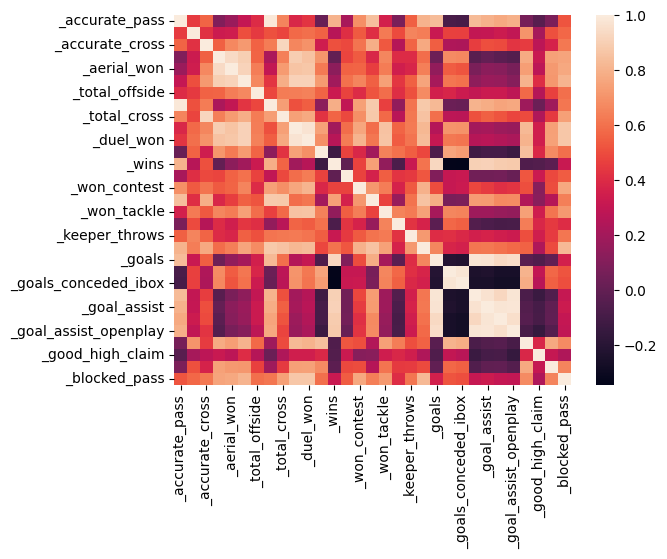

In [18]:
sns.heatmap(df_new.iloc[:, 2:].corr())

Больше всего нам интересны победы и голы, пусть они будут нашими целевыми признаками. Рассмотрим корреляцию других признаков к целевым

In [19]:
df_new.iloc[:, 2:].corr()[['_wins', '_goals']]

,_wins,_goals
_accurate_pass,0.805450,0.835788
_accurate_goal_kicks,0.261601,0.317812
_accurate_cross,0.507787,0.547056
_aerial_lost,0.000450,0.030392
_aerial_won,0.132071,0.149483
_total_long_balls,0.194158,0.208932
_total_offside,0.325679,0.353342
_total_pass,0.786480,0.822407
_total_cross,0.559679,0.594880
_duel_lost,0.195133,0.254718


Теперь возьмем полный датасет и посмотрим какие признаки наиболее зависимы и наименее, фильтровать будем по голам

In [20]:
#Значения нам нужны по модулю
df.iloc[:, 4:].corr()[['_wins', '_goals']].sort_values(by='_goals', key= lambda x: abs(x))[:20]

,_wins,_goals
_blocked_cross,-0.019882,-0.006862
_effective_blocked_cross,-0.019882,-0.006862
_pen_goals_conceded,-0.058224,0.011380
_second_yellow,-0.039736,0.020105
_saved_obox,-0.045355,-0.022564
_total_yel_card,-0.075796,-0.023742
_goal_kicks,-0.063823,-0.029602
_aerial_lost,0.000450,0.030392
_punches,-0.090507,-0.033714
_goals_conceded_obox,-0.141974,-0.054597


In [21]:
df.iloc[:, 4:].corr()[['_wins', '_goals']].sort_values(by='_goals', ascending=False, key= lambda x: abs(x))[:20]


,_wins,_goals
_goals,0.927502,1.000000
_att_ibox_goal,0.926681,0.989228
_goals_openplay,0.901347,0.974046
_goal_assist,0.909072,0.973457
_goal_assist_openplay,0.881483,0.951449
_big_chance_scored,0.872015,0.944535
_first_half_goals,0.882594,0.943093
_goal_assist_intentional,0.889731,0.936239
_wins,1.000000,0.927502
_ontarget_scoring_att,0.865614,0.918042


Сгруппируем датасет по командам, берем среднее значение т.к. не все команды играли все сезоны

In [22]:
df_group = df_new.iloc[:, 1:].groupby(by='club_name', as_index=False).mean()

In [23]:
df_group.head()

,club_name,_accurate_pass,_accurate_goal_kicks,_accurate_cross,_aerial_lost,_aerial_won,_total_long_balls,_total_offside,_total_pass,_total_cross,_duel_lost,_duel_won,_saves,_wins,_draws,_won_contest,_won_corners,_won_tackle,_total_yel_card,_keeper_throws,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_openplay,_goal_assist,_goal_assist_intentional,_goal_assist_openplay,_goal_kicks,_good_high_claim,_blocked_cross,_blocked_pass
0,Arsenal,15058.000000,137.200000,137.800000,520.800000,447.400000,1649.600000,59.200000,17770.000000,630.8,1669.400000,1611.600000,93.400000,18.4,6.800000,306.800000,206.000000,284.800000,55.000000,179.200000,5487.800000,59.400000,39.600000,35.0,41.400000,40.600000,31.000000,33.400000,218.200000,23.000000,41.000000,435.400000
1,Aston Villa,11099.600000,168.400000,143.600000,533.200000,529.200000,1874.600000,52.200000,13877.600000,635.6,1750.800000,1818.800000,104.400000,13.8,6.400000,305.400000,180.400000,293.800000,69.000000,155.600000,4912.400000,48.400000,48.000000,40.6,32.400000,35.200000,27.600000,28.000000,254.800000,35.200000,59.400000,455.600000
2,Bournemouth,9273.000000,154.666667,119.666667,575.333333,534.333333,1715.333333,44.333333,12070.333333,498.0,1784.666667,1624.000000,111.333333,9.0,5.333333,284.000000,151.666667,292.333333,59.333333,156.000000,4680.000000,35.333333,57.333333,50.0,23.333333,22.666667,17.666667,17.333333,261.666667,22.666667,69.333333,416.000000
3,Brentford,9271.333333,156.666667,141.000000,564.333333,568.000000,1919.000000,57.000000,12310.666667,549.0,1594.333333,1622.333333,111.666667,11.0,8.333333,220.333333,138.333333,298.000000,52.666667,138.666667,4890.666667,44.000000,44.333333,36.0,25.333333,28.333333,23.000000,21.000000,241.000000,33.333333,49.333333,363.333333
4,Brighton and Hove Albion,14885.800000,174.800000,150.800000,452.000000,499.400000,1833.400000,57.800000,17822.200000,621.4,1663.800000,1702.600000,88.000000,11.2,11.600000,300.400000,186.800000,327.600000,57.200000,173.000000,5701.200000,46.200000,46.000000,39.6,32.400000,30.800000,23.800000,26.000000,227.000000,26.000000,43.000000,504.600000


In [24]:
#Посмотрим на самые успешные команды за последние 10 лет по наибольшему количеству голов
df_group[['club_name', '_goals', '_wins']].sort_values(by='_goals', ascending=False)[:10]

,club_name,_goals,_wins
14,Manchester City,84.600000,24.400000
12,Liverpool,73.000000,22.400000
21,Tottenham Hotspur,62.000000,17.200000
11,Leicester City,62.000000,15.250000
0,Arsenal,59.400000,18.400000
15,Manchester United,55.200000,17.600000
6,Chelsea,55.000000,15.800000
10,Leeds United,50.666667,11.333333
24,West Ham United,49.200000,13.200000
1,Aston Villa,48.400000,13.800000


<Axes: xlabel='_goals', ylabel='Count'>

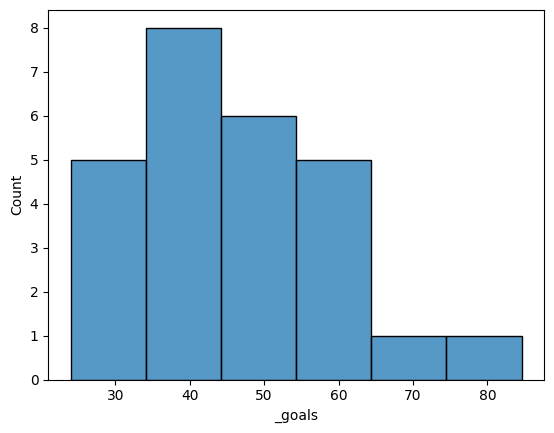

In [25]:
sns.histplot(df_group['_goals'])

<Axes: xlabel='_wins', ylabel='Count'>

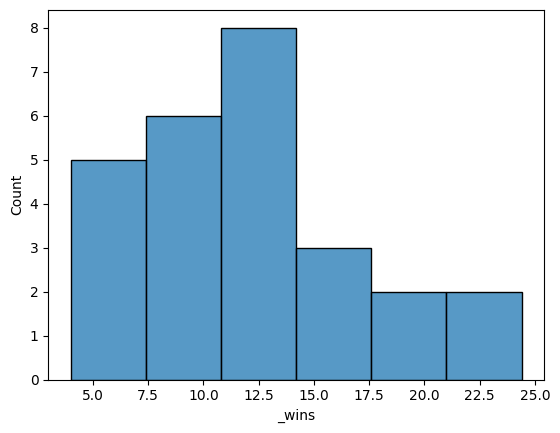

In [26]:
sns.histplot(df_group['_wins'])

<Axes: xlabel='_draws', ylabel='Count'>

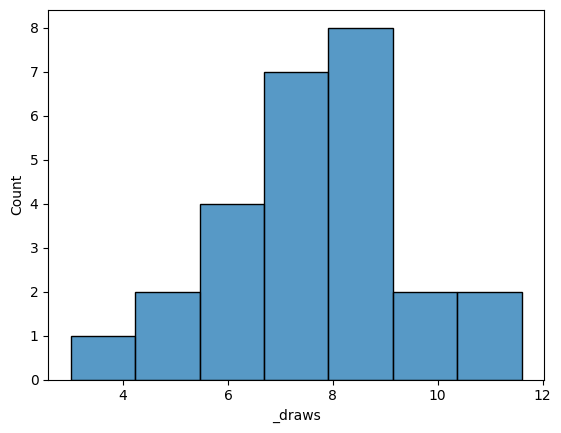

In [27]:
sns.histplot(df_group['_draws'])

In [28]:
df_new.shape

(100, 33)

In [29]:
df_new

,season,club_name,_accurate_pass,_accurate_goal_kicks,_accurate_cross,_aerial_lost,_aerial_won,_total_long_balls,_total_offside,_total_pass,_total_cross,_duel_lost,_duel_won,_saves,_wins,_draws,_won_contest,_won_corners,_won_tackle,_total_yel_card,_keeper_throws,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_openplay,_goal_assist,_goal_assist_intentional,_goal_assist_openplay,_goal_kicks,_good_high_claim,_blocked_cross,_blocked_pass
0,2023,Arsenal,9878.0,78.0,100.0,260.0,249.0,829.0,40.0,11335.0,397.0,950.0,944.0,29.0,12.0,4.0,151.0,158.0,182.0,30.0,108.0,3420.0,37.0,20.0,18.0,19.0,23.0,18.0,17.0,103.0,21.0,9.0,172.0
1,2022,Arsenal,17458.0,113.0,138.0,564.0,490.0,1721.0,56.0,20450.0,674.0,1840.0,1846.0,95.0,26.0,6.0,357.0,223.0,343.0,52.0,174.0,6354.0,88.0,43.0,36.0,66.0,64.0,49.0,55.0,185.0,17.0,46.0,301.0
2,2021,Arsenal,15254.0,132.0,149.0,577.0,470.0,1865.0,66.0,18290.0,633.0,1778.0,1678.0,100.0,22.0,3.0,319.0,209.0,311.0,60.0,175.0,5836.0,61.0,48.0,42.0,39.0,42.0,29.0,31.0,251.0,29.0,39.0,561.0
3,2020,Arsenal,17118.0,142.0,161.0,604.0,515.0,1850.0,61.0,20126.0,751.0,1763.0,1656.0,96.0,18.0,7.0,296.0,208.0,252.0,47.0,206.0,6007.0,55.0,39.0,35.0,42.0,39.0,31.0,35.0,238.0,23.0,42.0,566.0
4,2019,Arsenal,15582.0,221.0,141.0,599.0,513.0,1983.0,73.0,18649.0,699.0,2016.0,1934.0,147.0,14.0,14.0,411.0,232.0,336.0,86.0,233.0,5822.0,56.0,48.0,44.0,41.0,35.0,28.0,29.0,314.0,25.0,69.0,577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023,Wolverhampton Wanderers,7220.0,103.0,80.0,235.0,260.0,1085.0,44.0,8941.0,312.0,1009.0,1102.0,60.0,8.0,4.0,239.0,91.0,226.0,52.0,108.0,2981.0,30.0,31.0,28.0,20.0,24.0,21.0,17.0,162.0,27.0,28.0,170.0
96,2022,Wolverhampton Wanderers,13590.0,161.0,156.0,543.0,468.0,2152.0,62.0,16712.0,661.0,1941.0,1890.0,119.0,11.0,8.0,375.0,186.0,370.0,84.0,196.0,5549.0,31.0,58.0,51.0,19.0,12.0,10.0,9.0,283.0,43.0,46.0,432.0
97,2021,Wolverhampton Wanderers,14236.0,200.0,137.0,494.0,465.0,2245.0,61.0,17517.0,587.0,1906.0,1919.0,125.0,15.0,6.0,450.0,168.0,377.0,59.0,220.0,5795.0,38.0,43.0,37.0,24.0,22.0,19.0,16.0,275.0,42.0,69.0,630.0
98,2020,Wolverhampton Wanderers,14570.0,196.0,171.0,608.0,581.0,2186.0,38.0,17522.0,775.0,1959.0,2015.0,103.0,12.0,9.0,468.0,209.0,335.0,53.0,156.0,5594.0,36.0,52.0,49.0,21.0,21.0,16.0,13.0,275.0,22.0,57.0,578.0


Рассмотрим совместное распределение признаков между собой 

In [30]:
df_new.iloc[:,5:8]

,_aerial_lost,_aerial_won,_total_long_balls
0,260.0,249.0,829.0
1,564.0,490.0,1721.0
2,577.0,470.0,1865.0
3,604.0,515.0,1850.0
4,599.0,513.0,1983.0
...,...,...,...
95,235.0,260.0,1085.0
96,543.0,468.0,2152.0
97,494.0,465.0,2245.0
98,608.0,581.0,2186.0


In [31]:
sns.__version__

'0.13.1'

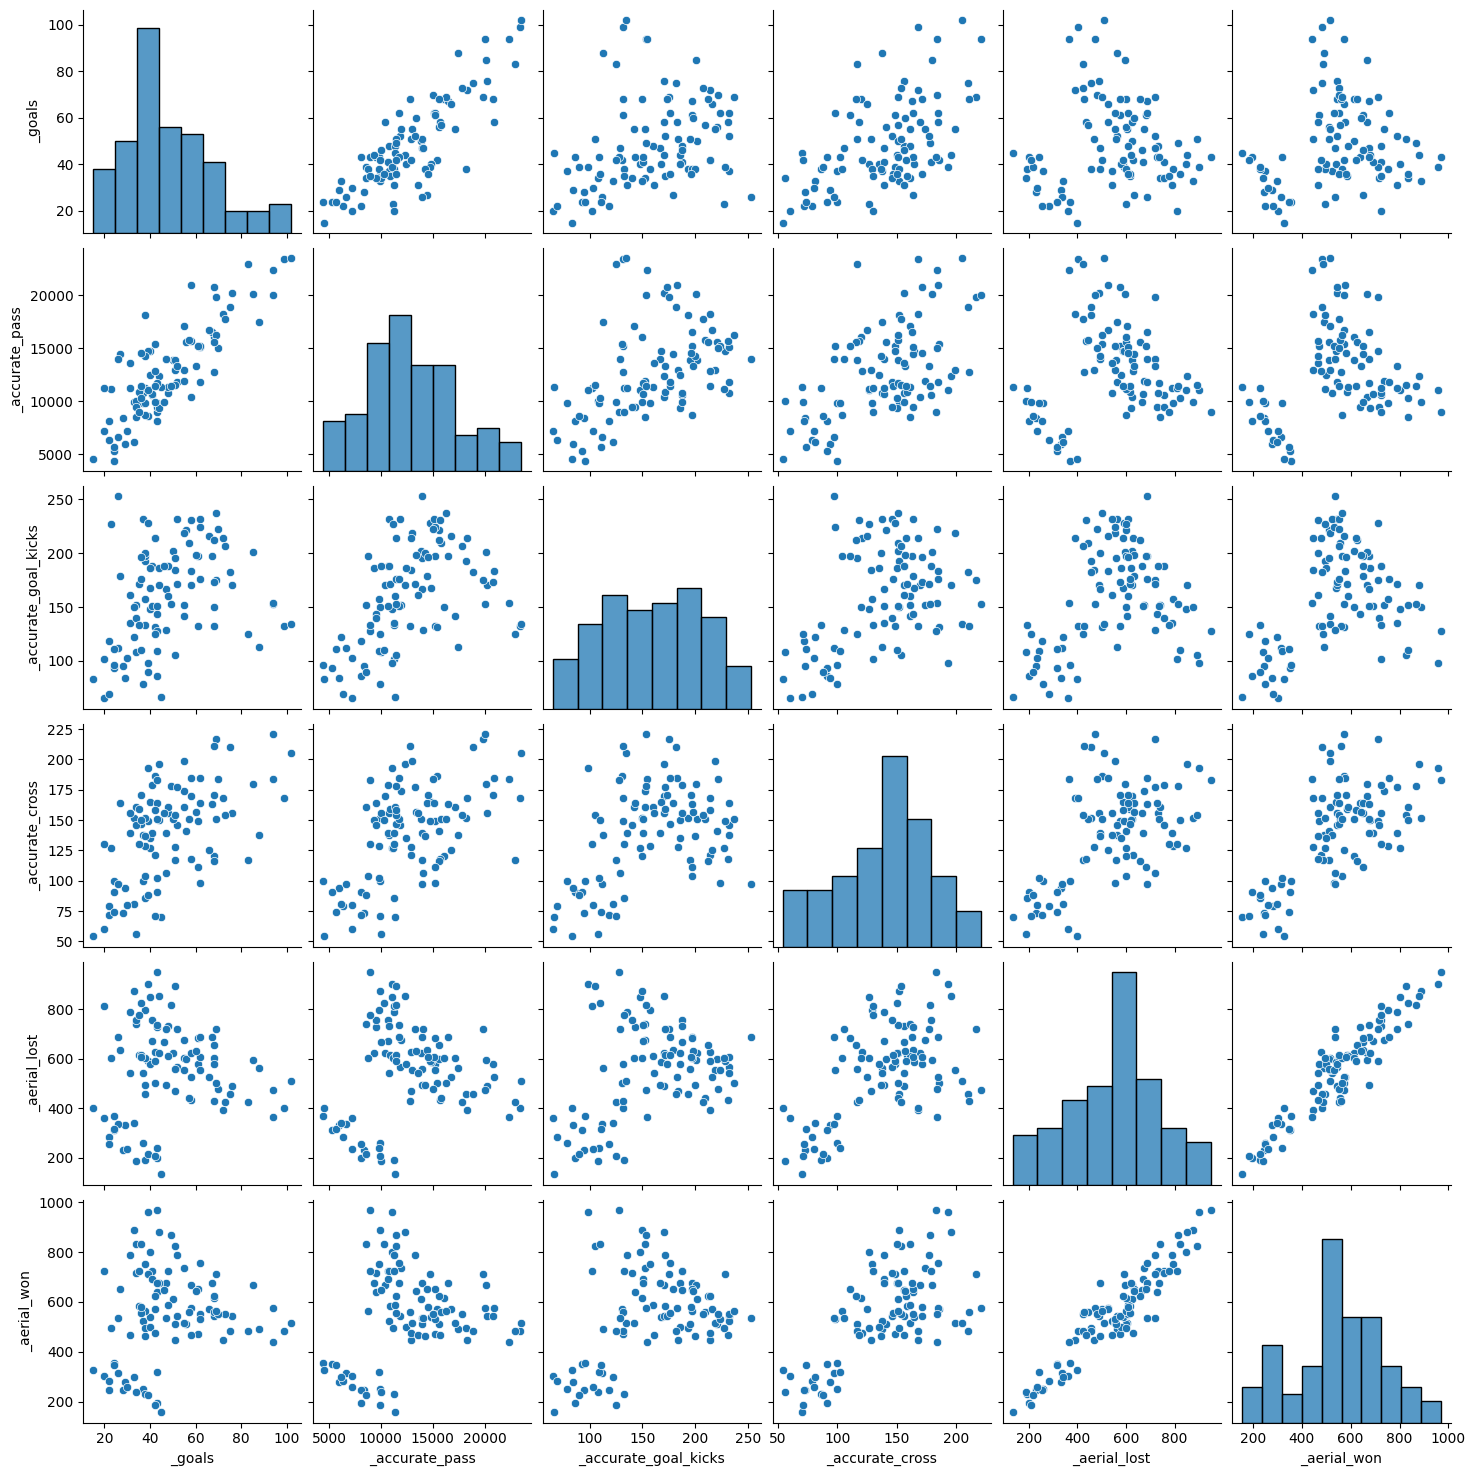

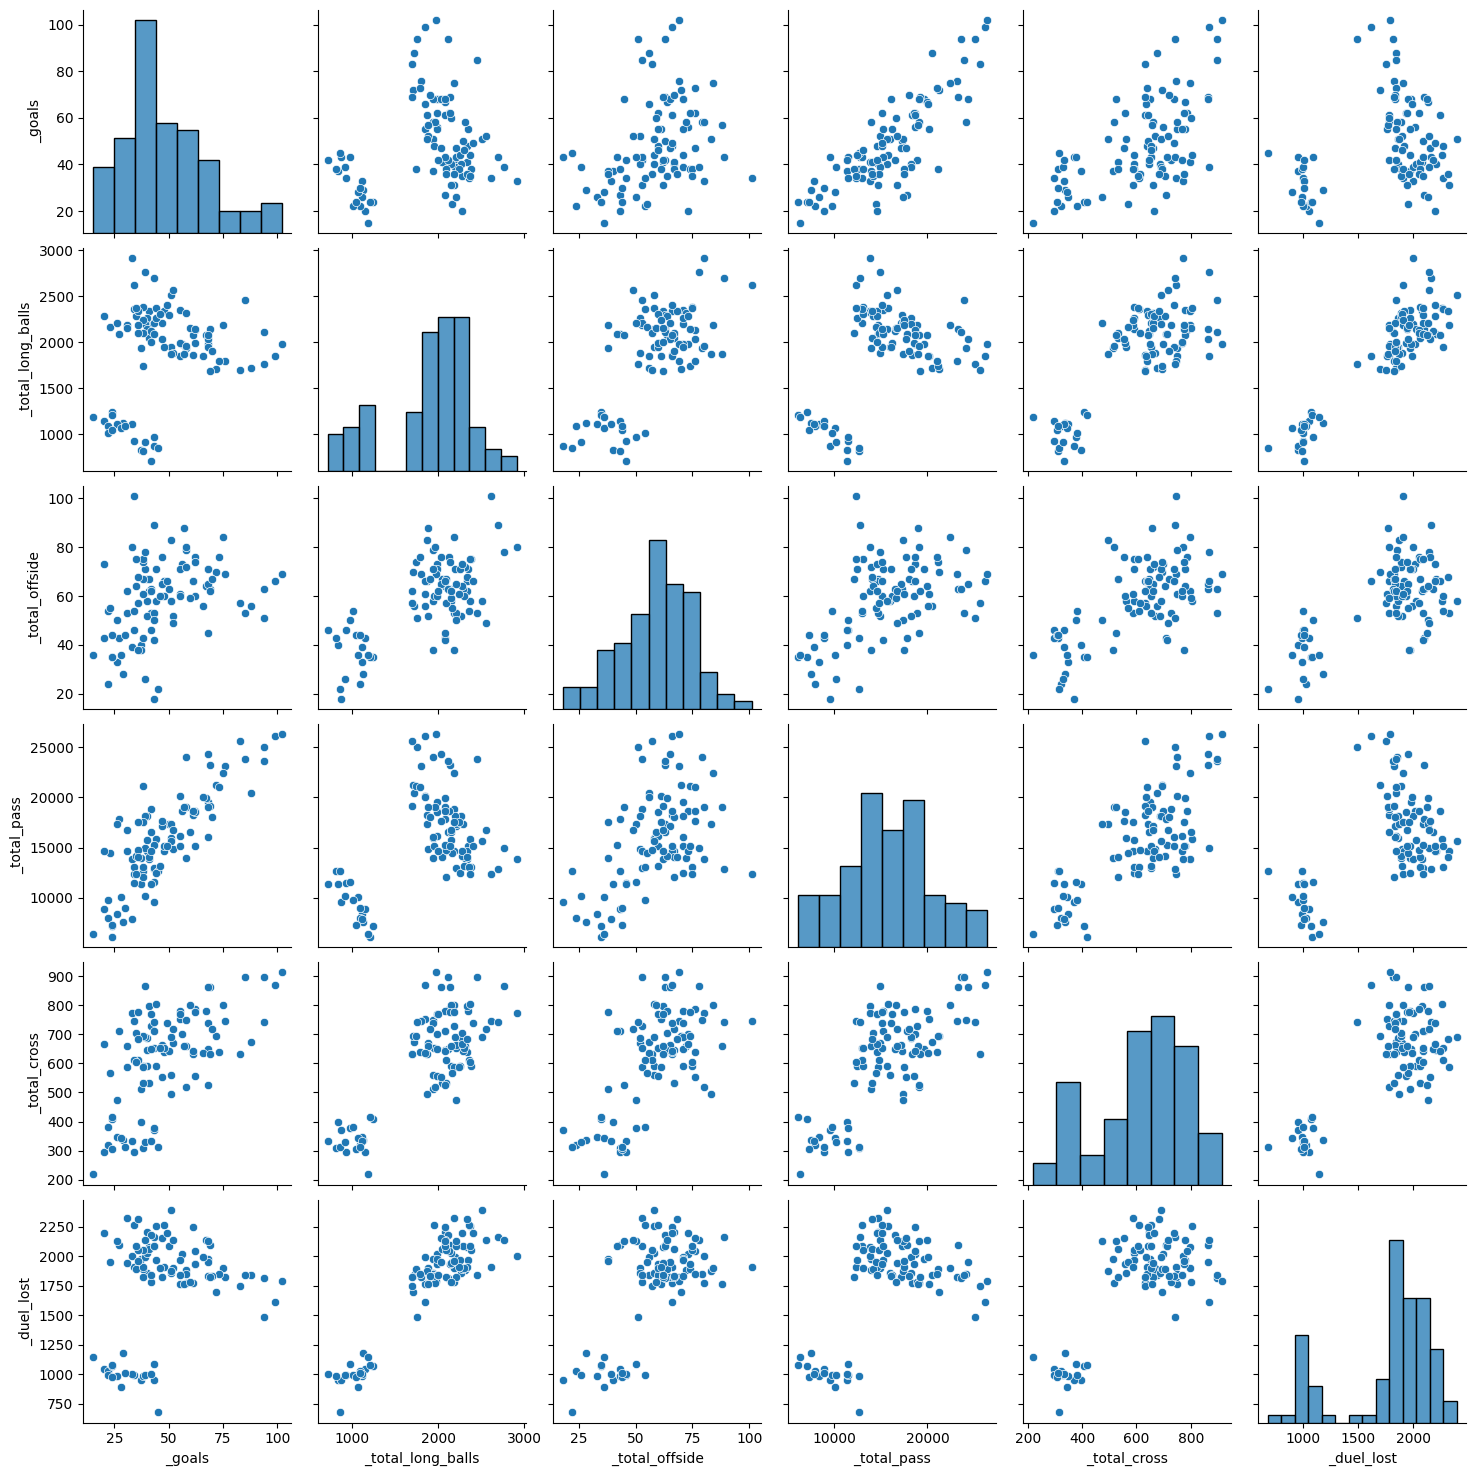

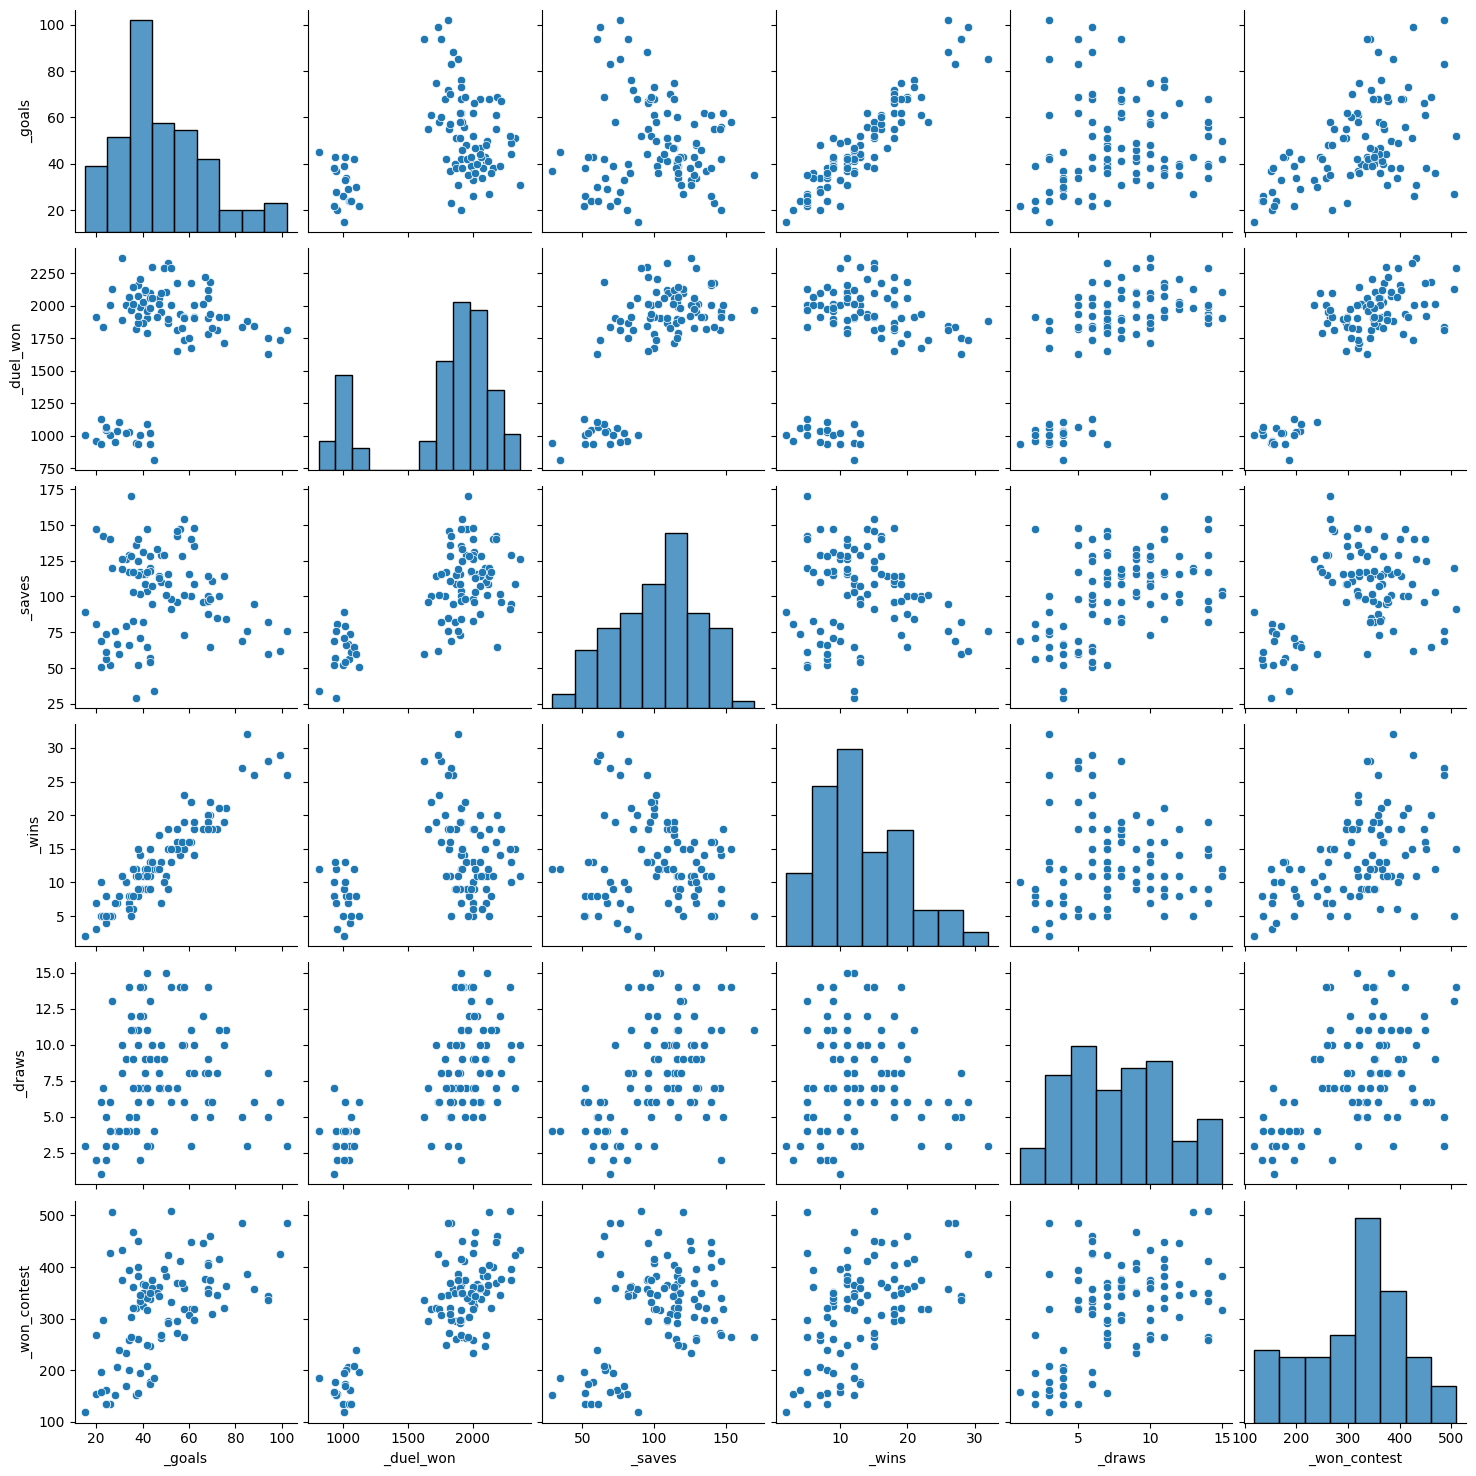

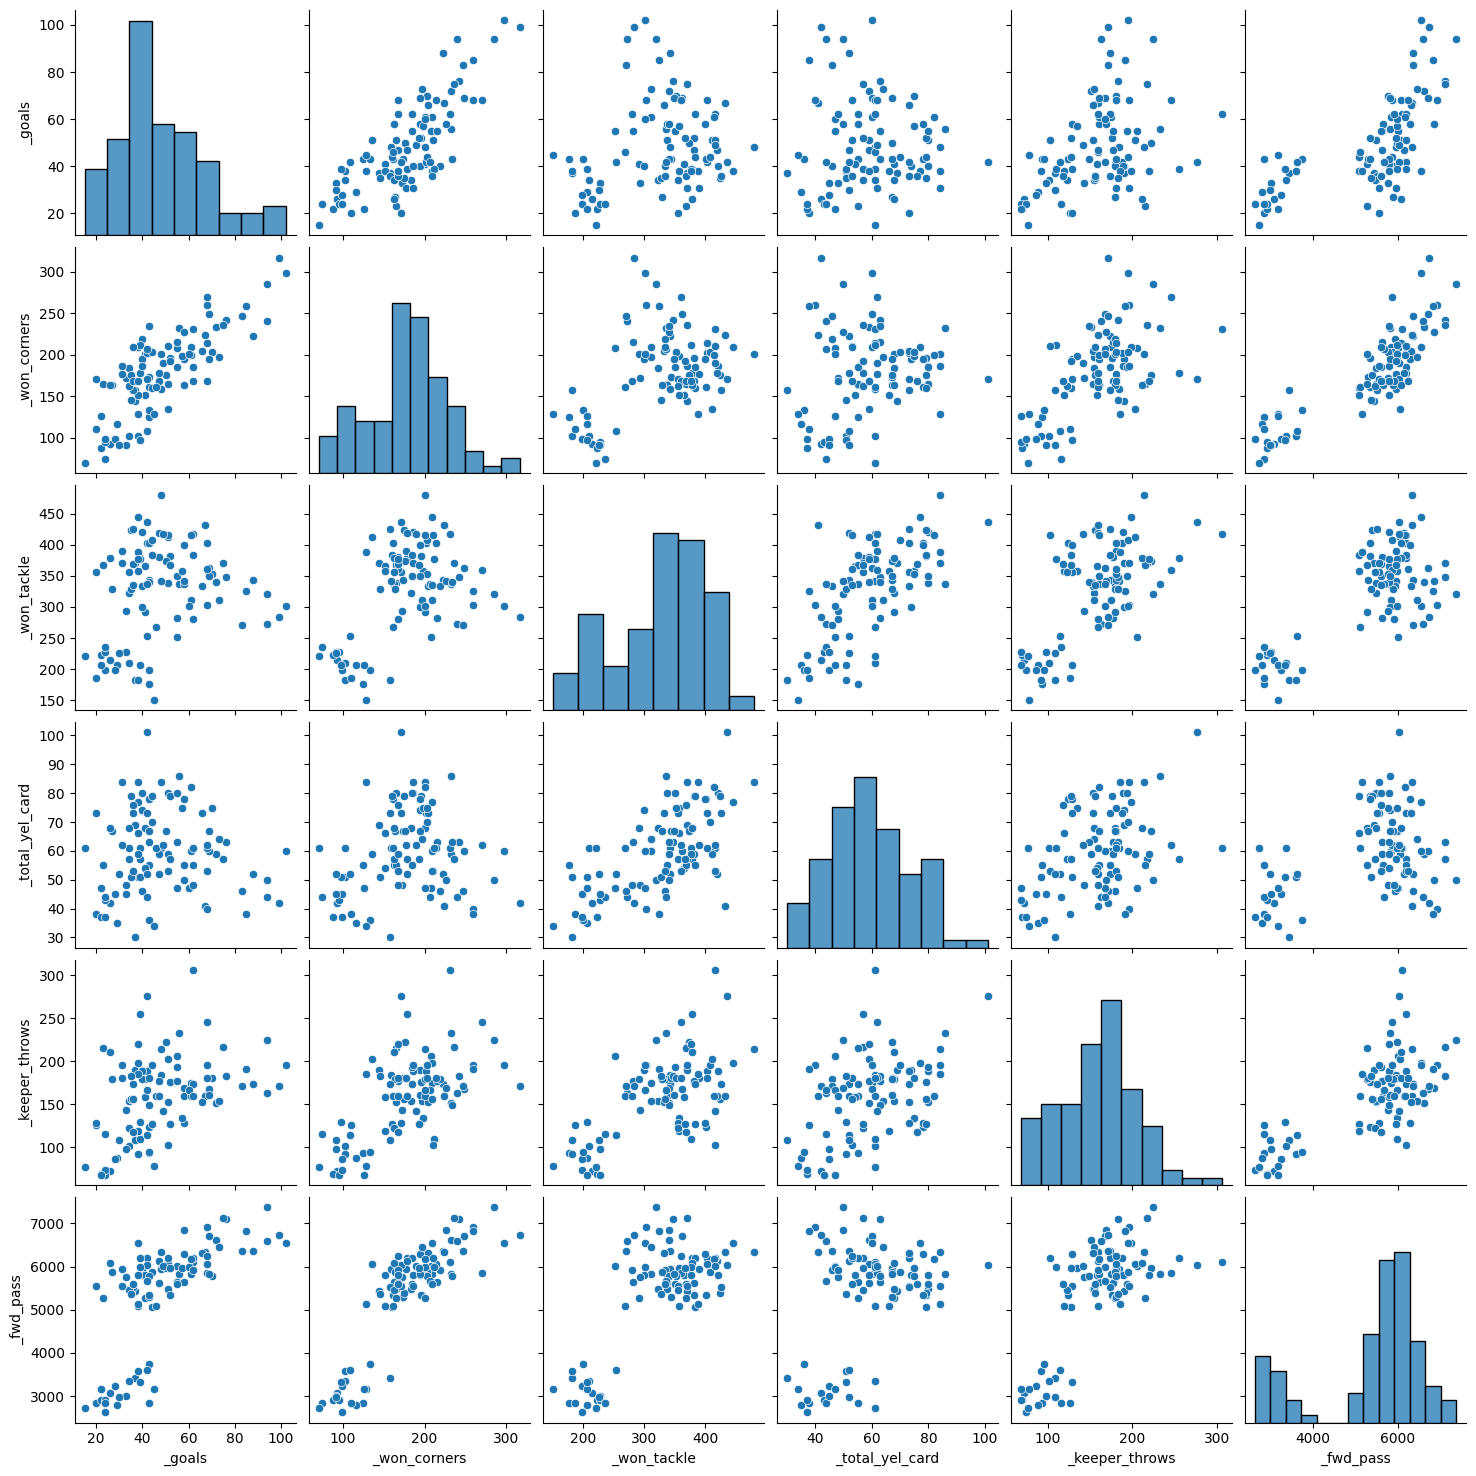

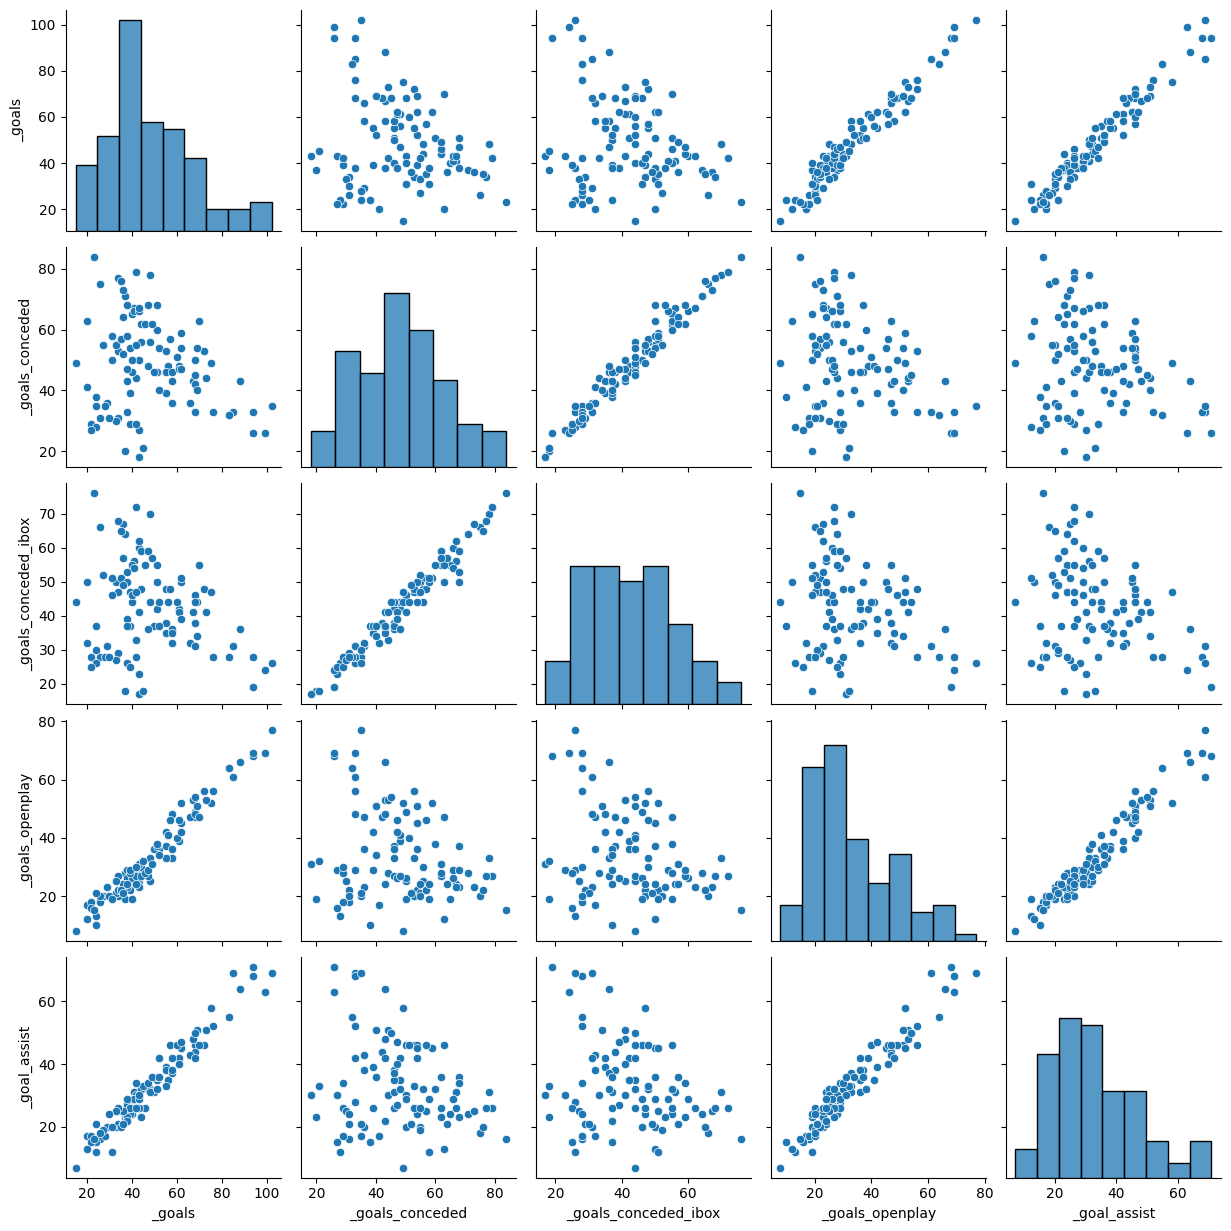

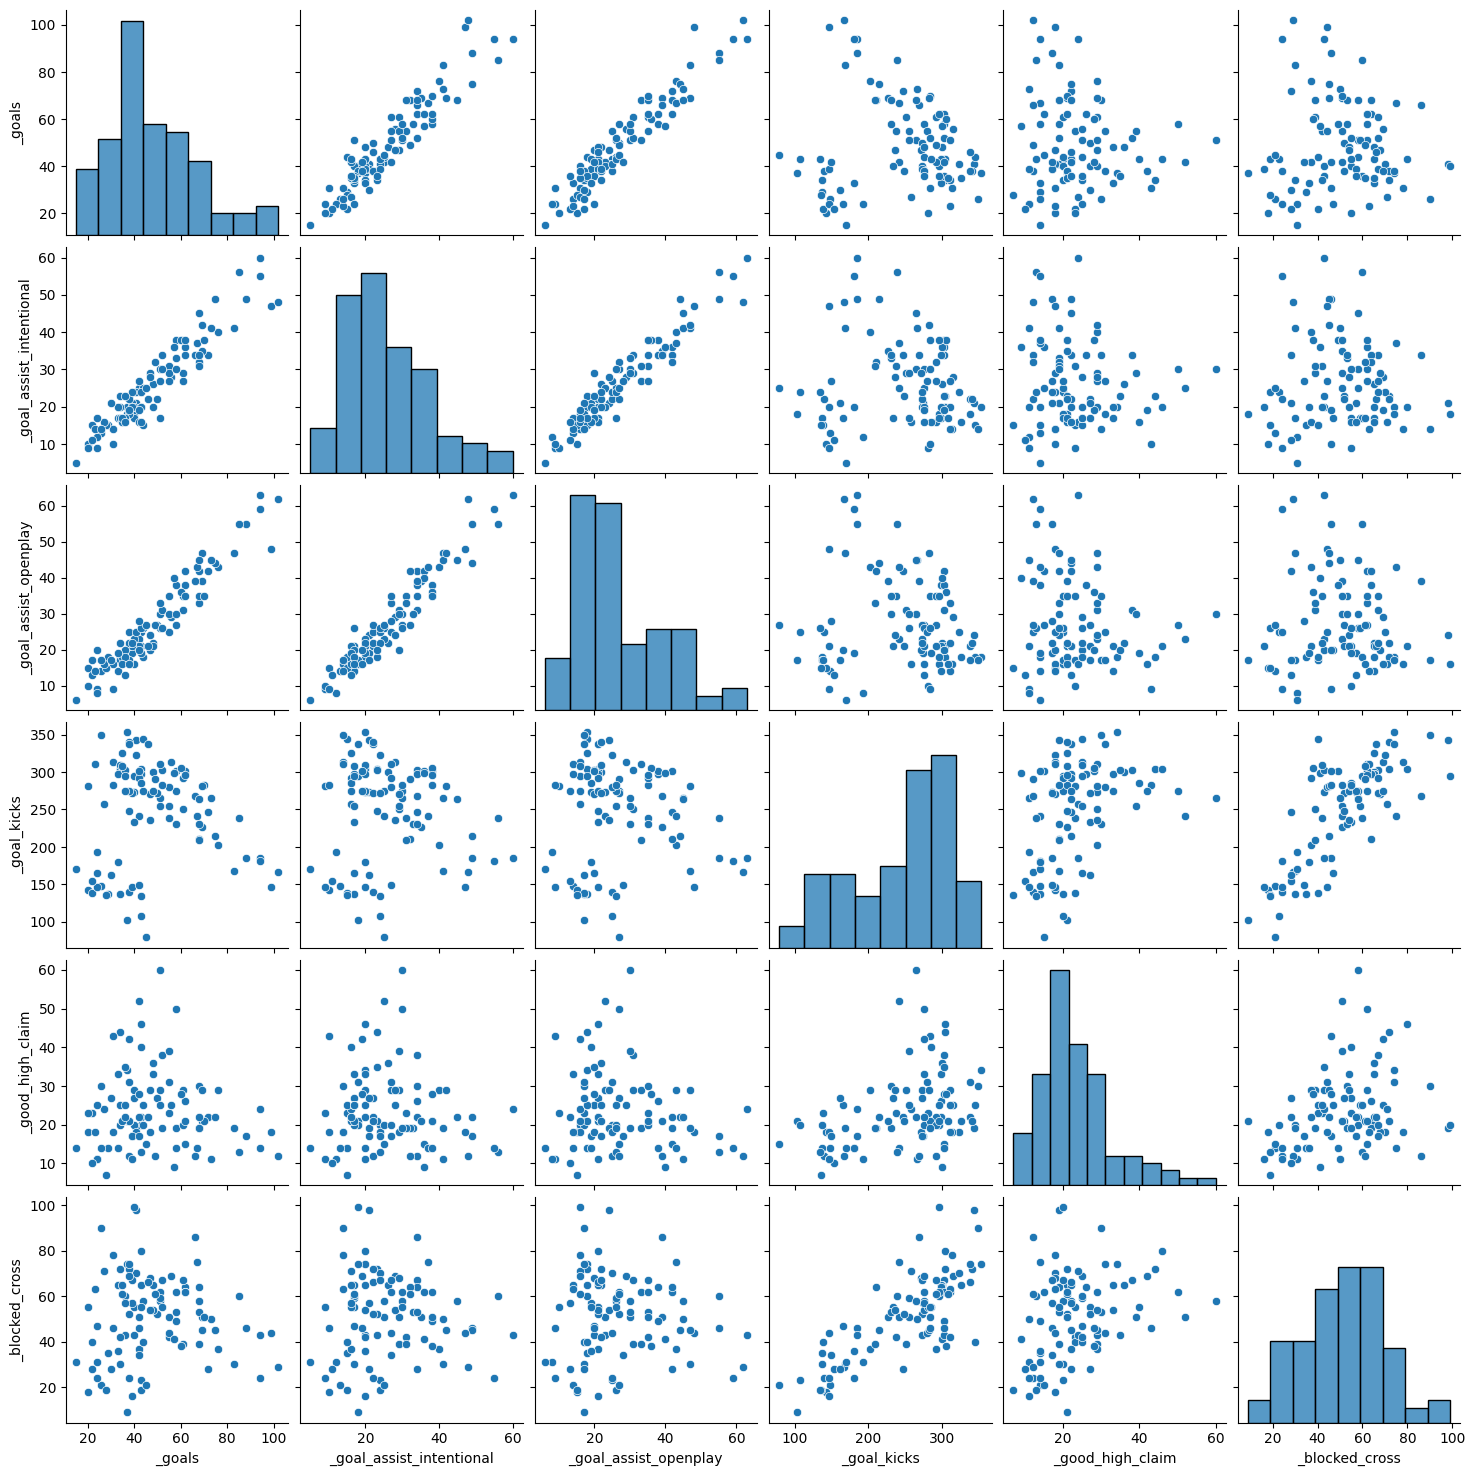

In [33]:
n = 5
target_id = 22  # _goals

for col in range(2, df_new.shape[1] - n, n):
    indices = [target_id] + list(range(col, col + n))
    
    if target_id in range(col, col + n):
        indices.remove(target_id)

    sns.pairplot(df_new.iloc[:, indices])

In [35]:
df.to_csv('eda_data/clubs_stat.csv', index=False)